## Constraint Satisfaction Problem
#### Assigning values to variables under constraints **

### Map Coloring Problem


![MAP](map.jpg)

Color assignments for the regions:
WA: red
NT: green
Q: red
NSW: green
V: red
SA: blue
T: red


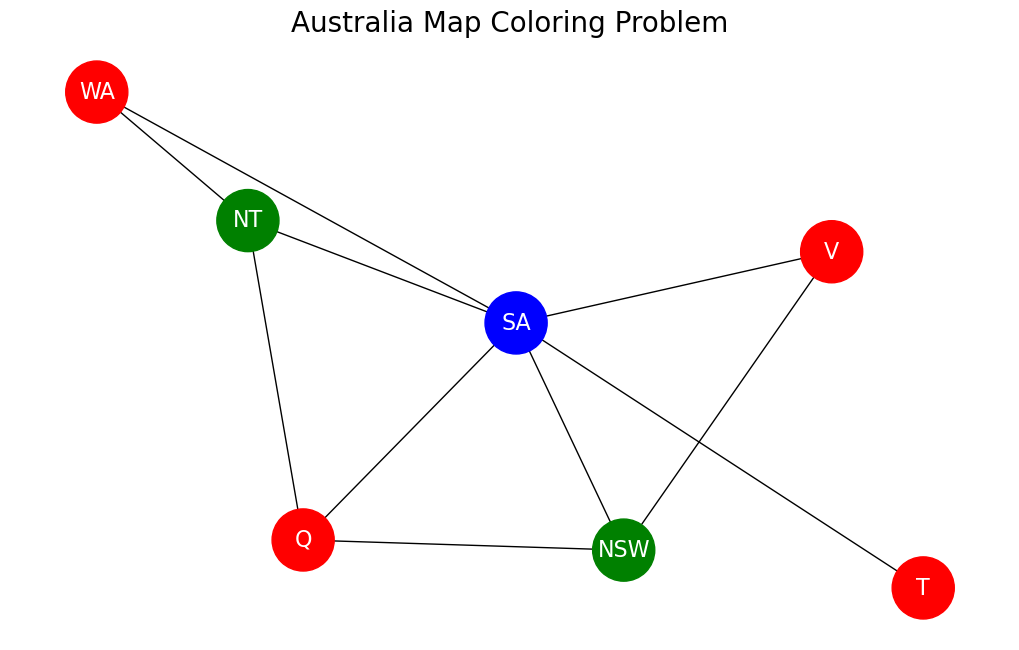

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the regions and their adjacency
regions = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'Q', 'SA'],
    'Q': ['NT', 'NSW', 'SA'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'T': ['SA']
}

colors = ['red', 'green', 'blue']  # Possible colors
assignment = {}  # To store the color assignments

def is_valid_assignment(region, color):
    """Check if the color assignment is valid."""
    for neighbor in regions[region]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def select_unassigned_region():
    """Select the first unassigned region."""
    for region in regions:
        if region not in assignment:
            return region
    return None

def backtrack():
    """Recursive backtracking algorithm to solve the map coloring problem."""
    # If all regions are assigned, we have a solution
    if len(assignment) == len(regions):
        return assignment

    # Select an unassigned region
    unassigned_region = select_unassigned_region()

    for color in colors:
        if is_valid_assignment(unassigned_region, color):
            # Assign color to the region
            assignment[unassigned_region] = color
            
            # Recursively try to assign colors to the rest
            result = backtrack()
            if result:
                return result  # Solution found
            
            # Backtrack: remove the color assignment
            del assignment[unassigned_region]

    return None  # No valid assignment path found

def visualize():
    """Visualize the coloring solution using a graph."""
    # Create a graph
    G = nx.Graph()

    # Add nodes and edges based on regions and adjacency
    for region in regions:
        G.add_node(region)
        for neighbor in regions[region]:
            G.add_edge(region, neighbor)

    # Set colors for nodes based on the assignment
    color_map = []
    for region in G.nodes:
        color_map.append(assignment.get(region, 'lightgrey'))  # Default color for unassigned regions

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, with_labels=True, node_color=color_map, node_size=2000, font_size=16, font_color='white')
    plt.title("Australia Map Coloring Problem", fontsize=20)
    plt.show()

# Solve the map coloring problem
solution = backtrack()

# Display the solution
if solution:
    print("Color assignments for the regions:")
    for region, color in solution.items():
        print(f"{region}: {color}")
    
    # Visualize the coloring solution
    visualize()
else:
    print("No solution exists.")


In [12]:
#######